In [1]:
import warnings
warnings.filterwarnings("ignore")

import sys

sys.path.append("../")

from depo.functions import Functions as func
import pandas as pd

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dttt1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df_train = func.open_file('dataSet.zip/train.csv')

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      99 non-null     int64 
 1   text    99 non-null     object
 2   genre   99 non-null     object
dtypes: int64(1), object(2)
memory usage: 2.4+ KB


In [3]:
df_train.head()

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama


In [4]:
df_train = df_train.drop('id', axis=1)

In [5]:
df_train.print_nan_columns()

,Missing Values,% Missing Values,Zero Values,% Missing Values,Zero Missing Values,% Zero Missing Values,Data Type
text,0,0.0,0,0.0,0,0.0,object
genre,0,0.0,0,0.0,0,0.0,object
Total,0,0.0,0,0.0,0,0.0,-


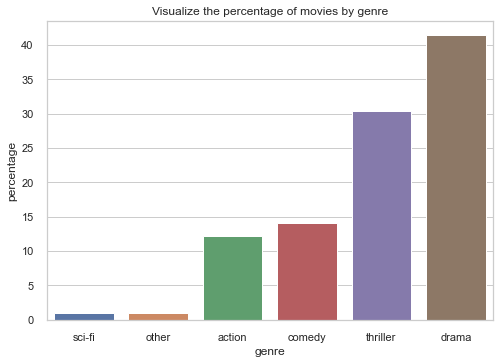

In [6]:
df_perc = (df_train["genre"].value_counts() / len(df_train)) * 100
df_perc.sort_values(inplace=True)  

df_perc = df_perc.to_frame()
df_perc.columns = ['percentage']
df_perc.index.names = ['genre']
df_perc['genre'] = df_perc.index

import seaborn as sns
import pylab as plt

sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'genre', y = 'percentage', data=df_perc)
plt.title('Visualize the percentage of movies by genre')
plt.show()


In [7]:
# Maps the genres to value
genre_mapper = {'other': 0, 'action': 1, 'adventure': 2, 'comedy':3, 'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8}
df_train['genre_index'] = df_train['genre'].map(genre_mapper)
df_train.head(10)

,text,genre,genre_index
0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller,8
1,"t, summa cum laude and all. And I'm about to l...",comedy,3
2,"up Come, I have a surprise.... She takes him ...",drama,4
3,ded by the two detectives. INT. JEFF'S APARTME...,thriller,8
4,"nd dismounts, just as the other children reach...",drama,4
5,breadth of the bluff. Gabe pulls out his ancie...,thriller,8
6,uilding. A MAN in pajamas runs out into the ra...,thriller,8
7,ELLES AND RITA HAYWORTH Just disgustingly rich...,drama,4
8,"Memphis goes back into the garage, Budgy cack...",thriller,8
9,e reels as the world spins. Sweat pours off hi...,action,1


In [8]:
#df_train['text'] = df_train['text'].remove_special_characters()
corpus = df_train['text'].get_stemme_text()

In [9]:
df_movies_genres = pd.DataFrame(columns=['text', 'genre', 'genre_index'])

#df_unique = df_train[{'genre', 'genre_index'}].sort_values(by = 'genre_index', ascending=True).unique()

df_unique = df_train.drop_duplicates(['genre','genre_index'])[['genre','genre_index']]
df_unique = df_unique.sort_values(by = 'genre_index', ascending=True).reset_index(drop=True)

for i in range(0, len(df_unique)):
    for j in list(df_train[df_train['genre_index']== df_unique['genre_index'][i]].index):
        text = corpus[j]
        genre = df_unique['genre'][i]
        genre_index = df_unique['genre_index'][i]
        
        df_movies_genres = df_movies_genres.append({'text': text
                                                  , 'genre': genre 
                                                  , 'genre_index': genre_index}, ignore_index=True) 

print(df_movies_genres)

                                                 text     genre genre_index
0   wan oh god paus alright shake carlotta carlott...     other           0
1   e reel world spin sweat pour pressur build ins...    action           1
2   enter hous int brownston day continu action wo...    action           1
3   ow could know father even know fed oh know was...    action           1
4   n spartan contort defiant sneer face int cryo ...    action           1
..                                                ...       ...         ...
94  upend hoist attach polic tow truck area less b...  thriller           8
95  en helm offic mister branson plot laid sir rik...  thriller           8
96  ok watch ground front melt like molten lava sw...  thriller           8
97  kinda pretti thought mayb could lunch answer a...  thriller           8
98  look opinion frank kidnap dorothi son husband ...  thriller           8

[99 rows x 3 columns]
